# Step 1: Load Cleaned CSVs

In [1]:
import pandas as pd

benin = pd.read_csv("D:/programming/python tenx/Solar-Data-Discovery/data/benin_clean.csv", parse_dates=['Timestamp'])
togo = pd.read_csv("D:/programming/python tenx/Solar-Data-Discovery/data/togo_clean.csv", parse_dates=['Timestamp'])
sierraleone = pd.read_csv("D:/programming/python tenx/Solar-Data-Discovery/data/sierraleone_clean.csv", parse_dates=['Timestamp'])

benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierraleone['Country'] = 'Sierra Leone'

df_all = pd.concat([benin, togo, sierraleone], ignore_index=True)


# Step 2: Boxplots for GHI, DNI, DHI (side-by-side by country)

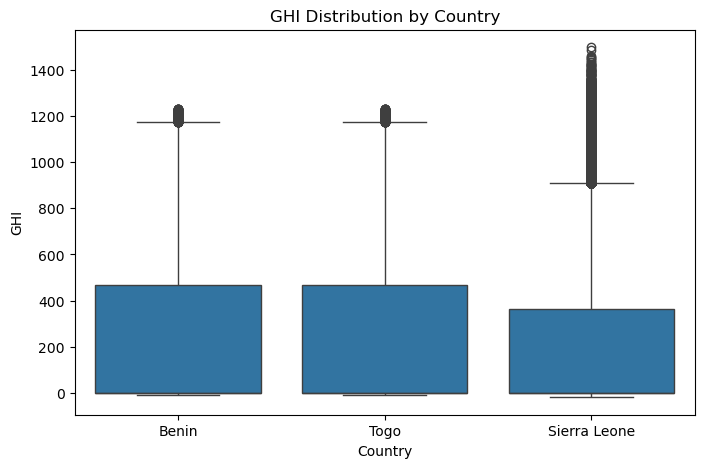

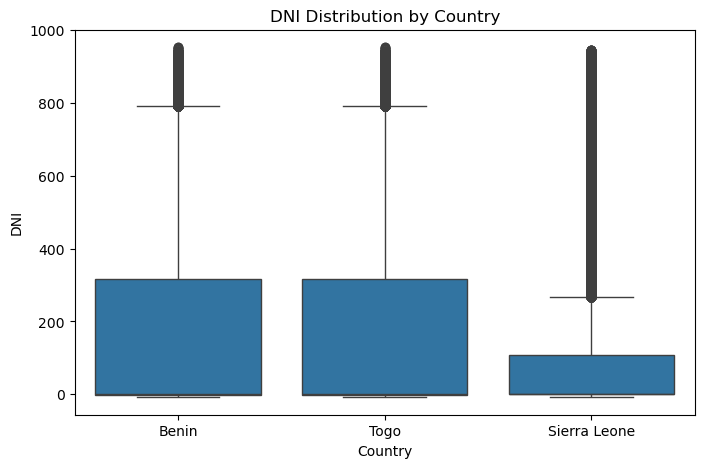

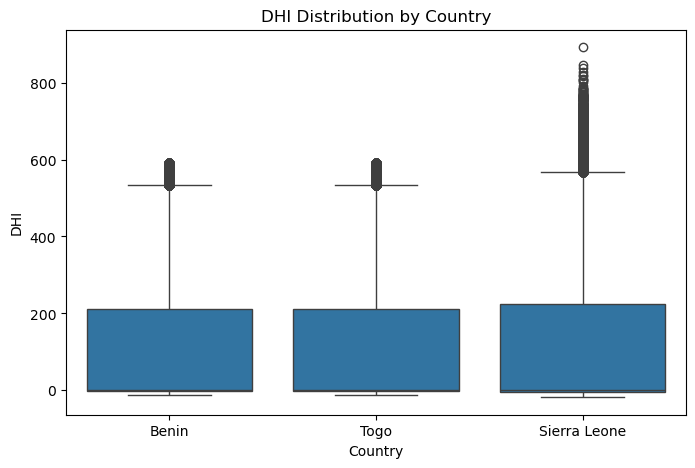

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='Country', y=metric)
    plt.title(f"{metric} Distribution by Country")
    plt.show()


# Step 3: Summary Table (mean, median, std)

In [7]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.round(2)


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  158.95  
Togo          153.10

#  Step 4: Statistical Testing

In [8]:
from scipy.stats import f_oneway, kruskal

f_stat, p_val = f_oneway(
    benin['GHI'].dropna(),
    togo['GHI'].dropna(),
    sierraleone['GHI'].dropna()
)
print(f"ANOVA p-value: {p_val:.4f}")

h_stat, p_kw = kruskal(
    benin['GHI'].dropna(),
    togo['GHI'].dropna(),
    sierraleone['GHI'].dropna()
)
print(f"Kruskal-Wallis p-value: {p_kw:.4f}")


ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


# Step 5: Key Observations

- Togo shows the highest average GHI, with a wider range of values.
- Sierra Leone has the lowest median GHI, suggesting less solar resource.
- Variability in DNI is greater than DHI across all three countries.


# Bar Chart of Avg GHI

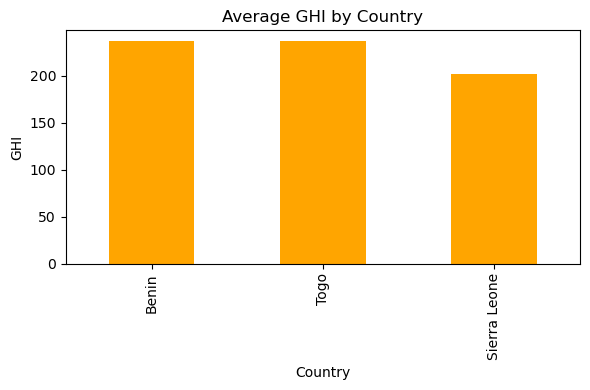

In [12]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
avg_ghi.plot(kind="bar", color="orange")
plt.title("Average GHI by Country")
plt.ylabel("GHI")
plt.tight_layout()
plt.show()

